# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description 

##### This research used the TMDb (The Movie Database) movie dataset, which contains a range of movie-related information gathered from TMDb. This dataset includes information about movies such as their costs, revenues, genres, cast, crew, etc.The dataset consists of the following columns:

######  id: Unique identifier for each movie.
######   imdb_id: Unique identifier for each movie in the IMDb database.
######   popularity: Popularity score of the movie.
######   budget: Budget of the movie in dollars.
######   revenue: Revenue generated by the movie in dollars.
######   original_title: Original title of the movie.
######   cast: Main cast of the movie.
######   homepage: Homepage URL of the movie.
######  director: Director of the movie.
######   tagline: Tagline of the movie.
######  keywords: Keywords describing the movie.
######  overview: Brief description of the movie.
######  runtime: Duration of the movie in minutes.
######  genres: Genres associated with the movie.
######  production_companies: Production companies involved in making the movie.
######  release_date: Release date of the movie.
######  vote_count: Number of votes received by the movie.
######  vote_average: Average vote score of the movie.
######  release_year: Year of release, derived from the release date.
######  budget_adj: Inflation-adjusted budget.
######  revenue_adj: Inflation-adjusted revenue.




In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure visualizations are plotted inline with the notebook
%matplotlib inline

In [137]:
def create_scatter_plot(x, y, data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x], data[y], alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [138]:
# Load the data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling
###  1. Check for missing values and duplicates
### 2. Handle missing values
#### We will handle missing values by:

* 1. Replacing 0 with NaN for the 'budget' and 'revenue' columns.
* 2. Filling NaN in categorical columns with 'unknown'.
* 3. Dropping rows with missing values in critical columns.
* 4. Dropping the 'homepage' column.

In [139]:
# Check for missing values and duplicates
missing_values = df.isnull().sum()
print(f'Missing values in each column before cleaning:\n{missing_values}')

Missing values in each column before cleaning:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [140]:
# Handle missing values
df["budget"] = df["budget"].replace(0, np.nan)
df["revenue"] = df["revenue"].replace(0, np.nan)

In [141]:
categorical_columns = [
    "imdb_id",
    "cast",
    "director",
    "tagline",
    "keywords",
    "overview",
    "genres",
    "production_companies",
]
# Fill NaN in categorical columns with 'unknown'
df[categorical_columns] = df[categorical_columns].fillna("unknown")


In [142]:
# Drop rows with missing values in critical columns
#df.dropna(subset=["budget", "revenue"], inplace=True)

In [143]:
# Drop "homepage" column
df.drop(columns=["homepage"], inplace=True)

In [144]:

# Drop rows with missing values in critical columns
df.dropna(subset=["budget", "revenue", "release_date"], inplace=True)


In [145]:
# Handle missing values for categorical columns
#for column in categorical_columns:
 #   df[column].fillna("unknown", inplace=True)


In [146]:
#  Verify that missing values have been handled
missing_values_after = df.isnull().sum()
print(f'Missing values in each column after cleaning:\n{missing_values_after}')



Missing values in each column after cleaning:
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


### Data Cleaning
#### In this step, we will:
####  1. Convert data types
#### 2.Create a new 'release_year' column.

In [147]:
# Convert data types
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")


In [148]:
# Create "release_year" column
df["release_year"] = df["release_date"].dt.year


In [149]:
# Verify cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3855 non-null   int64         
 1   imdb_id               3855 non-null   object        
 2   popularity            3855 non-null   float64       
 3   budget                3855 non-null   float64       
 4   revenue               3855 non-null   float64       
 5   original_title        3855 non-null   object        
 6   cast                  3855 non-null   object        
 7   director              3855 non-null   object        
 8   tagline               3855 non-null   object        
 9   keywords              3855 non-null   object        
 10  overview              3855 non-null   object        
 11  runtime               3855 non-null   int64         
 12  genres                3855 non-null   object        
 13  production_compan

<a id='eda'></a>
## Exploratory Data Analysis
#### Single-Variable Exploration
##### Distribution of Movie Runtimes

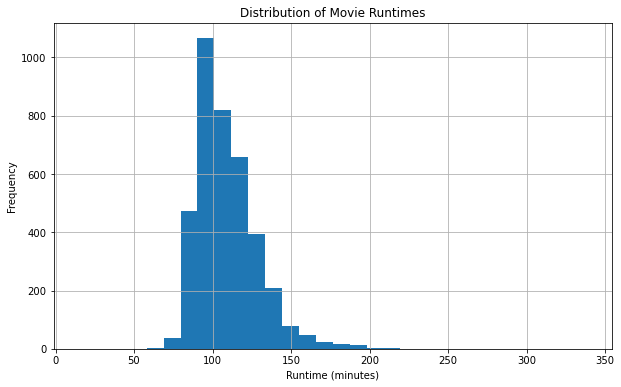

The histogram shows the distribution of movie runtimes, with most movies having a runtime between 90 and 120 minutes.


In [150]:
# Runtime distribution
plt.figure(figsize=(10, 6))
df['runtime'].hist(bins=30)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()
print("The histogram shows the distribution of movie runtimes, with most movies having a runtime between 90 and 120 minutes.")


#### Distribution of Movie Revenues

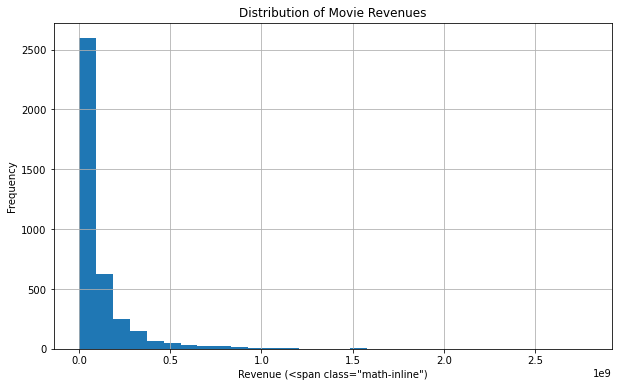

The histogram shows the distribution of movie revenues, with most movies having lower revenues, indicating a right\-skewed distribution\.


In [151]:
# Revenue distribution
plt.figure(figsize=(10, 6))
df['revenue'].hist(bins=30)
plt.xlabel('Revenue (<span class="math-inline")')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Revenues')
plt.show()
print("The histogram shows the distribution of movie revenues, with most movies having lower revenues, indicating a right\-skewed distribution\.")


#### Distribution of Movie Budgets

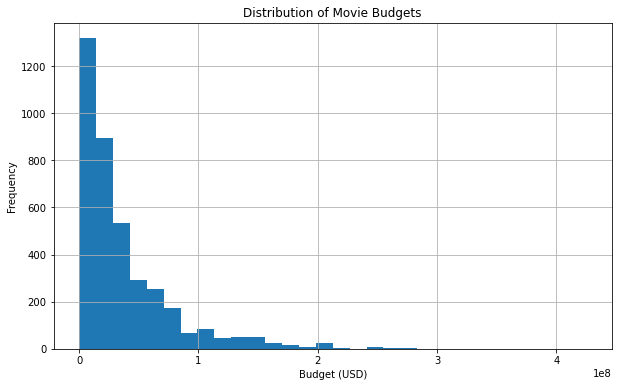

The histogram shows the distribution of movie budgets, with most movies having lower budgets, indicating a right-skewed distribution.


In [152]:
# Budget distribution
plt.figure(figsize=(10, 6))
df['budget'].hist(bins=30)
plt.xlabel('Budget (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.show()

print("The histogram shows the distribution of movie budgets, with most movies having lower budgets, indicating a right-skewed distribution.")


#### Distribution of Popularity Scores

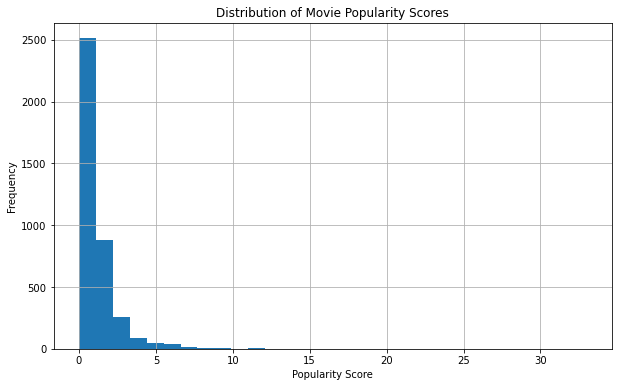

The histogram shows the distribution of movie popularity scores, with most movies having lower popularity scores, indicating a right-skewed distribution.


In [153]:
# Popularity distribution
plt.figure(figsize=(10, 6))
df['popularity'].hist(bins=30)
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Popularity Scores')
plt.show()

print("The histogram shows the distribution of movie popularity scores, with most movies having lower popularity scores, indicating a right-skewed distribution.")


### Multiple-Variable Exploration
#### Runtime vs Revenue

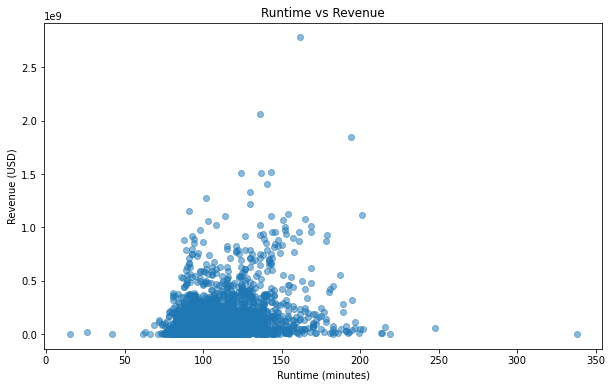

There is no significant relationship observed between runtime and revenue, indicating that longer films do not necessarily generate more revenue.


In [154]:
# Runtime vs Revenue
create_scatter_plot('runtime', 'revenue', df, 'Runtime (minutes)', 'Revenue (USD)', 'Runtime vs Revenue')
print("There is no significant relationship observed between runtime and revenue, indicating that longer films do not necessarily generate more revenue.")


#### Budget vs Revenue

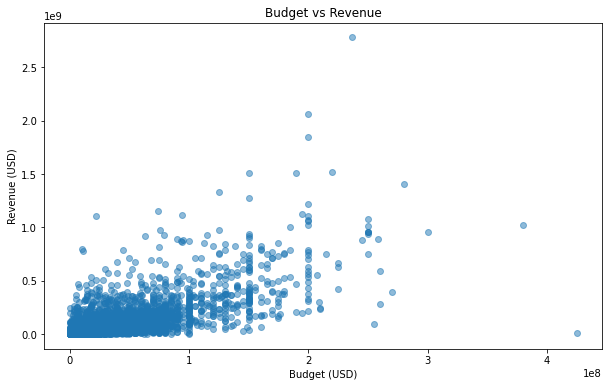

A positive relationship is observed between budget and revenue, suggesting that higher budget films tend to generate more revenue.


In [155]:
# Budget vs Revenue
create_scatter_plot('budget', 'revenue', df, 'Budget (USD)', 'Revenue (USD)', 'Budget vs Revenue')
print("A positive relationship is observed between budget and revenue, suggesting that higher budget films tend to generate more revenue.")


#### Budget vs Revenue Over Time

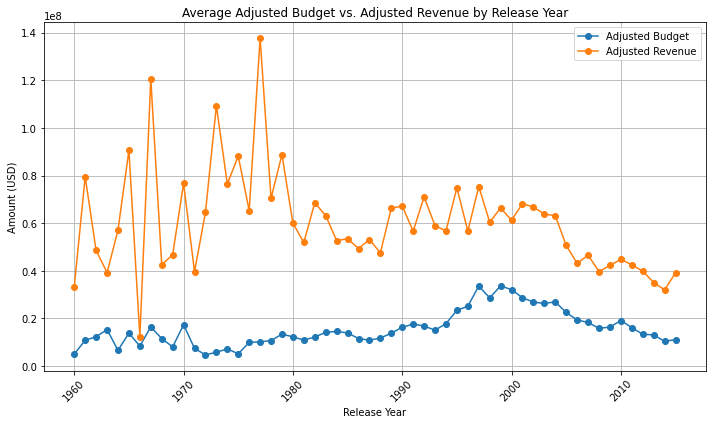

In [156]:
# Select relevant columns
data = pd.read_csv('tmdb-movies.csv')
data = data[['release_year', 'budget_adj', 'revenue_adj']]

# Calculate average budget and revenue every year
df_average = data.groupby('release_year')[['budget_adj', 'revenue_adj']].mean()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_average.index, df_average['budget_adj'], marker='o', label='Adjusted Budget')
plt.plot(df_average.index, df_average['revenue_adj'], marker='o', label='Adjusted Revenue')

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('Amount (USD)')
plt.title('Average Adjusted Budget vs. Adjusted Revenue by Release Year')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()


<a id='conclusions'></a>
## Conclusions
#### The investigation revealed no significant association between runtime and revenue, however a favorable correlation between budget and revenue was found. These findings can assist guide future film production and funding decisions.
Conclusions

#### Based on our exploratory data analysis, we can draw the following conclusions:

* The majority of movie runtimes fall between 90 and 120 minutes.
* Most films had lower revenues and expenditures, showing a right-skewed distribution.
* There is no substantial correlation between movie runtime and revenue.
* Higher-budget films typically earn more income.
* The average adjusted budget and income have fluctuated throughout time, reflecting shifts in the film industry and economic conditions.

In [157]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 805182 bytes to Investigate_a_Dataset.html
